In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate

The luminocity function for $1000Mpc^3$ can be approximated by the function for spirals galaxies

$$\phi (L)_{spiral}= 6.0(\frac{L}{L_*})^{-0.45} e^{-1.5 \frac{L}{L_*}}$$

for elliptical galaxies

$$\phi (L)_{elliptical}= 2.0 e^{-0.8 \frac{L}{L_*}}$$

We also know the Schechter Function which is a good approximation of all types of galaxies combined.

$$\phi (L)_{all}=  7.0(\frac{L}{L_*})^{-0.45} e^{-\frac{L}{L_*}}$$

Now we will prove that the Schechter Function is a good approximation of all types of galaxies combined. We will do this by graphing the luminocity function for spiral and elliptical galaxies and comparing that to the Schechter Function. 

In [2]:
def L_ratio(dx):
    L_ratio=np.linspace(0.1,4,dx)
    return L_ratio


In [3]:
def spiral(L_ratio):
    spiral=6*L_ratio**(-0.45)*np.exp(-1.5*L_ratio)
    return spiral
def elliptical(L_ratio):
    elliptical=2*np.exp(-0.8*L_ratio)
    return elliptical
def both(L_ratio):
    both=7*L_ratio**(-0.45)*np.exp(-L_ratio)
    return both

combined=[]
for i,j in zip(spiral(L_ratio(10000)),elliptical(L_ratio(10000))):
    combined.append(i+j)

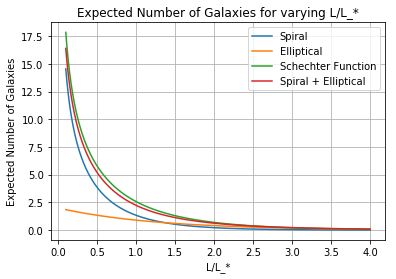

In [4]:
plt.plot(L_ratio(10000),spiral(L_ratio(10000)),label="Spiral")
plt.plot(L_ratio(10000),elliptical(L_ratio(10000)),label="Elliptical")
plt.plot(L_ratio(10000),both(L_ratio(10000)),label="Schechter Function")
plt.plot(L_ratio(10000),combined,label="Spiral + Elliptical")

plt.grid('on')
plt.title('Expected Number of Galaxies for varying L/L_*')
plt.xlabel('L/L_*')
plt.ylabel('Expected Number of Galaxies')
plt.legend(loc=0)

Looking at the graph we can see that when $\frac{L}{L_*}$ is larger than 2.5 that all three functions merge towards the same value. $\frac{L}{L_*}$ smaller than 2.5 all have different values. On average there are fewer elliptical when compared to either spiral galaxies or the total number of galaxies from the Schechter function. When we add the number of spiral galaxies to the number of elliptical galaxy we can see that the Schechter function almost overlaps the combined values. But the Schechter function slightly overestimates the values.

In [5]:
both_total=scipy.integrate.quad(both,0.1,4.0)
print("The number of galaxies in a 1000Mpc^3 cube of the universe using the Schechter Function is",both_total[0],"±", both_total[1])

spiral_total=scipy.integrate.quad(spiral,0.1,4.0)
elliptical_total=scipy.integrate.quad(elliptical,0.1,4.0)
combined_total=spiral_total[0]+elliptical_total[0]
combined_total_uncertainty=np.sqrt(spiral_total[1]**2+elliptical_total[1]**2)

print("The number of galaxies in a 1000Mpc^3 cube of the universe by combining the spiral and elliptical luminocity function is",combined_total,"±",combined_total_uncertainty)


The number of galaxies in a 1000pc^3 cube of the universe using the Schechter Function is 7.786537201956534 ± 6.478138130144029e-09
The number of galaxies in a 1000Mpc^3 cube of the universe by combining the spiral and elliptical luminocity function is 7.041213507339128 ± 5.498247350651098e-09


Here we can also speficially see that the Schechter Function slightly overestimates the actualy value when combining the number of spiral and elliptical galaxies. 

In [6]:
spiral_2=scipy.integrate.quad(spiral,0.1,0.2)
elliptical_2=scipy.integrate.quad(elliptical,0.1,0.2)
fraction_se2=spiral_2[0]/elliptical_2[0]
fraction_se2_uncertainty=np.sqrt(((1/elliptical_2[0])**2*(spiral_2[1])**2)+
                                 ((spiral_2[0]/(elliptical_2[0]**2))*(elliptical_2[1]**2)))

In [7]:
print(fraction_se2,"±",fraction_se2_uncertainty)

6.452429230591765 ± 7.261461750517366e-14


When comparing the amount of spiral galaxies to elliptical galaxies we can see that theres approximately 6.45 times the amount of spiral galaxies to elliptical galaxies when looking at values of $\frac{L}{L_*}$ between 0.1 and 0.2.

In [8]:
spiral_3=scipy.integrate.quad(spiral,3,4)
elliptical_3=scipy.integrate.quad(elliptical,3,4)
fraction_se3=spiral_3[0]/elliptical_3[0]
fraction_se3_uncertainty=np.sqrt(((1/elliptical_3[0])**2*(spiral_3[1])**2)+
                                 ((spiral_3[0]/(elliptical_3[0]**2))*(elliptical_3[1]**2)))

In [9]:
print(fraction_se3,"±",fraction_se3_uncertainty)

print(1/fraction_se3)

0.16013278727925045 ± 2.37186340914551e-15
6.2448172981347785


When comparing the amount of spiral galaies to elliptical galaxies between $\frac{L}{L_*}$ of 3 and 4 we can see that theres 0.160 times the amount of spiral galaxies to elliptical galaxies or 6.24 elliptical galaxies to spiral galaxies.


If the distance to the galaxy formation epoch is $10Gpc$. Therefore from the center of the universe the farthest galaxy is $10Gpc$. So we can look at the volume of a sphere that has a radius of $10Gpc$.

We know the volume a sphere to be 

$$
\begin{align}
V &=\frac{4}{3}\pi r^3 \\
&= \frac{4}{3}\pi (10Gpc)^3
\end{align}
$$


In [10]:
Volume=4/3*np.pi*(10)**3
print("The volume is", Volume,"Gpc^3")

The volume is 4188.790204786391 Gpc^3


We know the Schechter Function to be 

$$\phi(L)\Delta L = n_* (\frac{L}{L_*})^\alpha e^{\frac{-L}{L_*}}\frac{\Delta L}{L_*}$$

$n_*$ is the number density normalization factor.

Being a number density $n_*$ should be

$$n_*=\frac{N}{V}$$

The previous volume we used was $1000Mpc^3$ so we can calculate the number density for a sphere of $4188Gpc^3$

We are gonna use the number density from the previous Schechter Function.

$$
\begin{align}
n_* &= \frac{N}{V}\\
&= \frac{7.0*1000Mpc^3}{4188*10^3Mpc^3}
\end{align}
$$

In [19]:
n_star=(7.0*1000)/(Volume*10**3)
print(n_star)

0.001671126902464901


In [23]:
def both_10GPC(L_ratio,n_star):
    both=n_star*L_ratio**(-0.45)*np.exp(-L_ratio)
    return both

In [24]:
both_total_10Gpc=scipy.integrate.quad(both_10GPC,0,np.inf,args=(n_star))
print("The number of galaxies is",both_total[0],"±",both_total[1])

The number of galaxies is 7.786537201956534 ± 6.478138130144029e-09
